In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:

label={"abnormal":1,"normal":0}

In [ ]:

import os
from PIL import Image
import re
SIZE=228
SIZE = 228
image_dataset = []
mask_dataset = []
y_label=[]
def load_images_from_folder(folder_path,images,x):
    # Change directory to the folder containing the images
    os.chdir(folder_path)

    # Get list of files in the folder
    files = os.listdir()

    # Sort the list of files (example: alphabetically)
    files.sort(key=lambda x: int(re.findall(r'\d+', x.split("(")[1])[0]))

    for filename in tqdm(files):
        # Load each image
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter only image files
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path,0)
            image = Image.fromarray(img)                    # Convert the image array to a PIL Image object
            image = image.resize((SIZE, SIZE))
            images.append(np.array(image))
            y_label.append(label[x])

def load_masks_from_folder(folder_path,images):
    # Change directory to the folder containing the images
    os.chdir(folder_path)

    # Get list of files in the folder
    files = os.listdir()

    # Sort the list of files (example: alphabetically)
    files.sort(key=lambda x: int(re.findall(r'\d+', x.split("(")[1])[0]))

    for filename in tqdm(files):
        # Load each image
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter only image files
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path,0)
            image = Image.fromarray(img)                    # Convert the image array to a PIL Image object
            image = image.resize((96, 96))
            images.append(np.array(image))
# Example usage
folder_path = "/content/drive/MyDrive/data-20240411T063122Z-001/data/database/abnormal"  # Update this with your folder path
load_images_from_folder(folder_path,image_dataset,'abnormal')
folder_path = "/content/drive/MyDrive/data-20240411T063122Z-001/data/labels/abnormal"
load_masks_from_folder(folder_path,mask_dataset)
folder_path = "/content/drive/MyDrive/data-20240411T063122Z-001/data/database/normal"  # Update this with your folder path
load_images_from_folder(folder_path,image_dataset,'normal')
folder_path ="/content/drive/MyDrive/data-20240411T063122Z-001/data/labels/normal"
load_masks_from_folder(folder_path,mask_dataset)
print(len(image_dataset))
print(len(mask_dataset))

100%|██████████| 500/500 [00:04<00:00, 124.59it/s]

1000
1000


In [ ]:
print("No of images :",len(image_dataset))
print("No of masks :",len(mask_dataset))

No of images : 1000
No of masks : 1000


In [ ]:
print(image_dataset[1])

[[122 123 124 ... 124 121 119]
 [122 123 124 ... 122 118 115]
 [122 123 124 ... 120 114 111]
 ...
 [  4   4   4 ...  25  25  24]
 [  4   4   4 ...  25  24  24]
 [  4   4   4 ...  24  24  24]]


In [ ]:
print(f'Image dataset sample output: \n{mask_dataset[1]}')
print(f'mask dataset sample output: \n{image_dataset[1]}')


Image dataset sample output: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mask dataset sample output: 
[[122 123 124 ... 124 121 119]
 [122 123 124 ... 122 118 115]
 [122 123 124 ... 120 114 111]
 ...
 [  4   4   4 ...  25  25  24]
 [  4   4   4 ...  25  24  24]
 [  4   4   4 ...  24  24  24]]


In [ ]:
image_dataset_norm = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)

# Normalize(/255) and expand the dimensions along axis 3 in mask Dataset
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.
print(f'normalized mask dataset:\n {mask_dataset[1]}\n')
print(f'normalized image dataset:\n {image_dataset[1]}')


normalized mask dataset:
 [[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]

normalized image dataset:
 [[122 123 124 ... 124 121 119]
 [122 123 124 ... 122 118 115]
 [122 123 124 ... 120 114 111]
 ...
 [  4   4   4 ...  25  25  24]
 [  4   4   4 ...  25  24  24]
 [  4   4   4 ...  24  24  24]]


In [ ]:
import tensorflow as tf
from keras import layers,models


In [ ]:
def unet(input_shape=(228, 228, 1)):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='valid')(inputs)
    print(conv1.shape)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='valid')(conv1)
    print(conv1.shape)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)
    print("\n")

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='valid')(pool1)
    print(conv2.shape)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='valid')(conv2)
    print(conv2.shape)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)
    print("\n")

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='valid')(pool2)
    print(conv3.shape)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='valid')(conv3)
    print(conv3.shape)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    print(pool3.shape)
    print("\n")

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='valid')(pool3)
    print(conv4.shape)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='valid')(conv4)
    print(conv4.shape)
    #desired_size = (22, 22)  # Desired output size

    #conv4 = tf.image.resize(conv4, desired_size, method=tf.image.ResizeMethod.BILINEAR)

    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    print(pool4.shape)
    print("\n")

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='valid')(pool4)
    print(conv5.shape)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='valid')(conv5)
    print(conv5.shape)
    print("\n")

    # Decoder

    up5 = layers.Conv2DTranspose(1024, 2, strides=(2, 2), padding='valid')(conv5)


    print(up5.shape)
    desired_size = (12, 12)  # Desired output size

    c1 = tf.image.resize(conv4, desired_size, method=tf.image.ResizeMethod.BILINEAR)

    up5 = layers.concatenate([up5, c1], axis=3)

    print(up5.shape)

    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up5)
    print(conv6.shape)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    print(conv6.shape)
    print("\n")



    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='valid')(conv6)
   # desired_size = (57, 57)  # Desired output size

    #up6 = tf.image.resize(up6, desired_size, method=tf.image.ResizeMethod.BILINEAR)


    print(up6.shape)
    desired_size = (24, 24)  # Desired output size

    c2 = tf.image.resize(conv3, desired_size, method=tf.image.ResizeMethod.BILINEAR)

    up6 = layers.concatenate([up6, c2], axis=3)

    print(up6.shape)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up6)
    print(conv7.shape)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    print(conv7.shape)
    print("\n")

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv7)
    desired_size = (48, 48)  # Desired output size

    c3 = tf.image.resize(conv2, desired_size, method=tf.image.ResizeMethod.BILINEAR)

    print(up7.shape)
    up7 = layers.concatenate([up7, c3], axis=3)
    print(up7.shape)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up7)
    print(conv8.shape)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    print(conv8.shape)
    print("\n")

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='valid')(conv8)
    desired_size = (96, 96)  # Desired output size

    c4 = tf.image.resize(conv1, desired_size, method=tf.image.ResizeMethod.BILINEAR)

    up8 = layers.concatenate([up8, c4], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up8)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = unet()
model.summary()

(None, 226, 226, 64)
(None, 224, 224, 64)
(None, 112, 112, 64)


(None, 110, 110, 128)
(None, 108, 108, 128)
(None, 54, 54, 128)


(None, 52, 52, 256)
(None, 50, 50, 256)
(None, 25, 25, 256)


(None, 23, 23, 512)
(None, 21, 21, 512)
(None, 10, 10, 512)


(None, 8, 8, 1024)
(None, 6, 6, 1024)


(None, 12, 12, 1024)
(None, 12, 12, 1536)
(None, 12, 12, 512)
(None, 12, 12, 512)


(None, 24, 24, 512)
(None, 24, 24, 768)
(None, 24, 24, 256)
(None, 24, 24, 256)


(None, 48, 48, 256)
(None, 48, 48, 384)
(None, 48, 48, 128)
(None, 48, 48, 128)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 228, 228, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 226, 226, 

In [ ]:
from sklearn.model_selection import train_test_split
X_main, X_test, y_main, y_test = train_test_split(image_dataset_norm, mask_dataset, test_size = 0.15, random_state = 12)
val_size=0.15/(1-0.15)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size = val_size, random_state = 12)

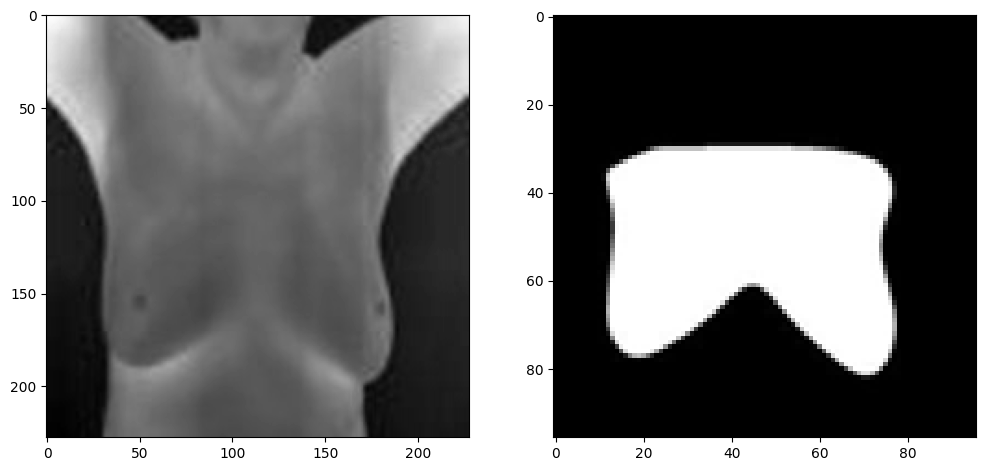

In [ ]:
import random
import numpy as np
image_number = random.randint(0,len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset_norm[image_number], (228, 228)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (96, 96)), cmap='gray')
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'],run_eagerly=True)

In [ ]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr *= 0.3  # Reduce learning rate by a factor of 0.3 every 10 epochs
        print(f'Reducing learning rate to: {lr}')
    return lr

lr_scheduler = LearningRateScheduler(scheduler)
hist1=model.fit(X_train, y_train, epochs=30, callbacks=[lr_scheduler],batch_size=8,validation_data=(X_val, y_val),shuffle=False)

Epoch 1/30


88/88 [==============================] - 62s 462ms/step - loss: 0.5492 - accuracy: 0.6913 - val_loss: 0.3345 - val_accuracy: 0.8022 - lr: 0.0010
Epoch 2/30
88/88 [==============================] - 23s 261ms/step - loss: 0.3221 - accuracy: 0.8097 - val_loss: 0.3010 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 3/30
88/88 [==============================] - 23s 260ms/step - loss: 0.3179 - accuracy: 0.8195 - val_loss: 0.3080 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 4/30
88/88 [==============================] - 23s 262ms/step - loss: 0.2418 - accuracy: 0.8474 - val_loss: 0.1944 - val_accuracy: 0.8641 - lr: 0.0010
Epoch 5/30
88/88 [==============================] - 26s 301ms/step - loss: 0.1608 - accuracy: 0.8765 - val_loss: 0.1531 - val_accuracy: 0.8816 - lr: 0.0010
Epoch 6/30
88/88 [==============================] - 23s 257ms/step - loss: 0.1118 - accuracy: 0.8930 - val_loss: 0.1037 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 7/30
88/88 [==============================] - 22s 254ms/step - loss: 

In [ ]:
model.save('/content/drive/MyDrive/u-net1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc = model.evaluate(X_val, y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 22s 2s/step - loss: 0.0231 - accuracy: 0.9161
Accuracy =  91.60510897636414 %


In [ ]:
y_pred=model.predict(X_test)
print(y_pred[:3])

5/5 [==============================] - 1s 222ms/step
[[[[1.2868547e-04]
   [6.6952953e-06]
   [9.2189254e-07]
   ...
   [1.2801679e-07]
   [1.8058734e-06]
   [2.7910923e-04]]

  [[9.4575290e-07]
   [3.6148649e-09]
   [3.8797499e-10]
   ...
   [1.8089022e-11]
   [1.0396304e-09]
   [2.1119095e-06]]

  [[1.9311679e-07]
   [1.4291417e-09]
   [5.0538563e-11]
   ...
   [3.9103243e-12]
   [2.2447377e-10]
   [8.7771758e-07]]

  ...

  [[3.5460058e-18]
   [6.9966517e-28]
   [1.5686118e-31]
   ...
   [0.0000000e+00]
   [1.7464757e-34]
   [5.1117338e-22]]

  [[5.5009354e-22]
   [8.2839607e-33]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [3.9709509e-22]]

  [[2.0614743e-18]
   [9.4144045e-30]
   [4.9730236e-35]
   ...
   [0.0000000e+00]
   [5.9706550e-32]
   [1.2307137e-18]]]


 [[[1.1319643e-06]
   [2.2601244e-08]
   [5.7423039e-10]
   ...
   [7.8517615e-22]
   [9.3149629e-20]
   [5.2295364e-13]]

  [[1.3258733e-09]
   [1.2993241e-12]
   [1.5260466e-14]
   ...
   [2.1623640

In [ ]:
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.8701955310796166


In [ ]:
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

1/1 [==============================] - 0s 44ms/step


In [ ]:
test_img_other = cv2.imread("/content/drive/MyDrive/data-20240411T063122Z-001/data/database/abnormal/abnormal_image (1).jpg", 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other = Image.fromarray(test_img_other)                    # Convert the image array to a PIL Image object
test_img_other = test_img_other.resize((SIZE, SIZE))
test_img_other=np.array(test_img_other)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

1/1 [==============================] - 0s 88ms/step


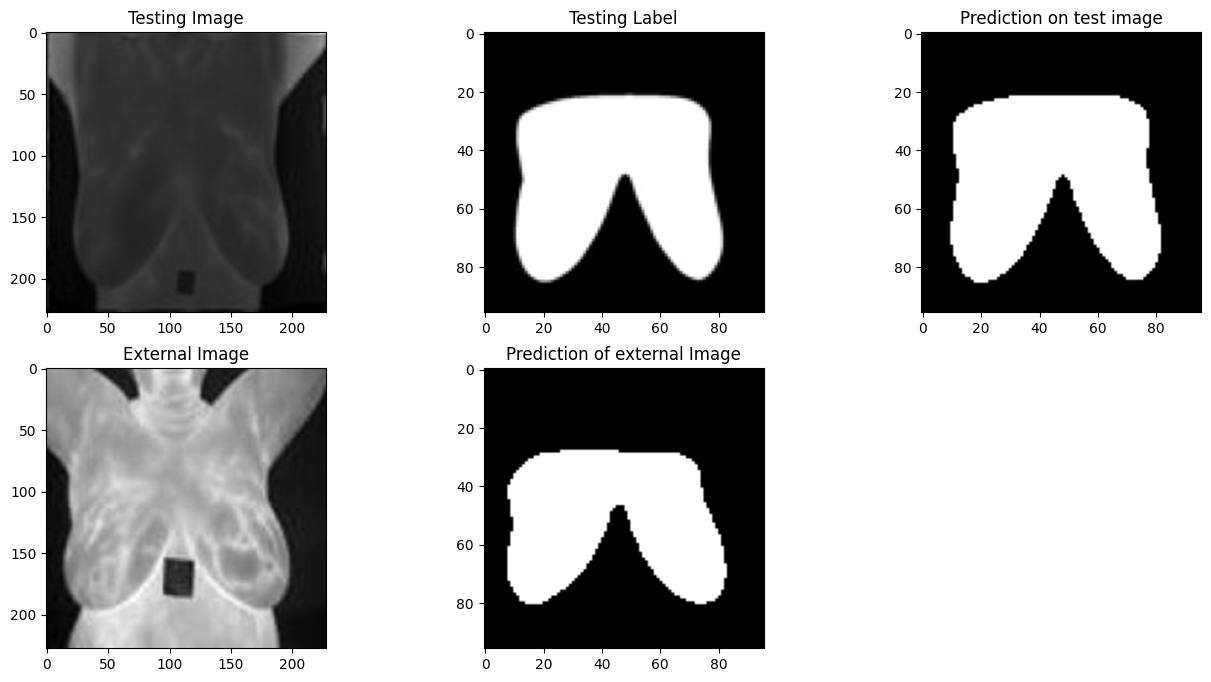

In [ ]:
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()

In [ ]:
y_mask=model.predict(image_dataset_norm)

32/32 [==============================] - 7s 217ms/step


In [ ]:
mask1=[]
for i in y_mask:
  a= cv2.resize(i, (228, 228), interpolation=cv2.INTER_CUBIC)

  mask1.append(np.array(a))

                    # Convert the image array to a PIL Image object

#


In [ ]:
import numpy as np
new=[]
for i in range(0,len(mask_dataset)):
    threshold = 0.5
    #image_dataset[i] = image_dataset[i].astype(np.uint8)
    masks=mask1[i]
    masks=  (masks> threshold).astype(int) *255
    masks = masks.astype(np.uint8)
    segmented_image_array = cv2.bitwise_and(image_dataset[i],image_dataset[i] , mask=masks)
    new.append(segmented_image_array)

In [ ]:
new[1].shape

(228, 228)

In [ ]:
print(new[1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
unique_values = np.unique(new[1])

# Now 'unique_values' contains the unique values present in the second segmented image array
print(unique_values)

[  0 124 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205]


In [ ]:
rgb_image = cv2.cvtColor(new[1], cv2.COLOR_GRAY2BGR)

print(rgb_image.shape)


(228, 228, 3)


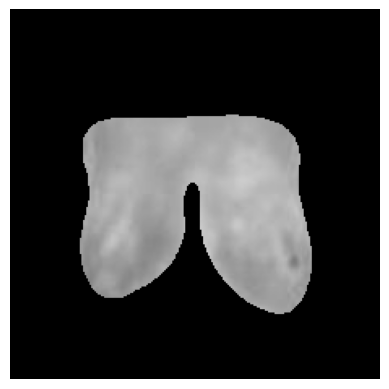

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'array_image' is your NumPy array representing the image
# Display the image using Matplotlib
plt.imshow(rgb_image )
plt.axis('off')  # Optional: turn off axis
plt.show()

In [ ]:
segment=[]
for i in new:
  rgb_image = cv2.cvtColor(i, cv2.COLOR_GRAY2BGR)
  segment.append(rgb_image)

In [ ]:


segment[1].shape

(228, 228, 3)

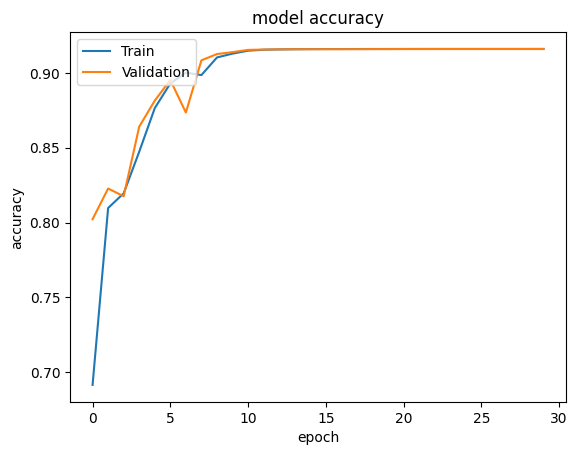

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

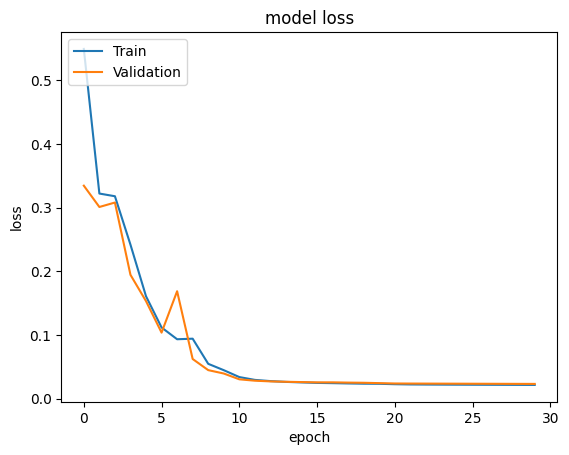

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D,ZeroPadding2D

In [ ]:
def create_model(input_shape):
    model = Sequential([
    Conv2D(64, (7, 7), strides=(6, 6), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),

    ZeroPadding2D(padding=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(256, (3, 3), activation='relu'),
    Dropout(0.25),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(256, (3, 3), activation='relu'),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),  # Adding dropout with a rate of 0.5
    Dense(1024, activation='relu'),
    Dropout(0.5),  # Adding dropout with a rate of 0.5
    Dense(2, activation='softmax')

  ])
    return model

input_shape = (228, 228, 3)
cnn_model = create_model(input_shape)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 37, 37, 64)        9472      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 18, 18, 64)        0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
from keras.optimizers import Adam
cnn_model.compile(optimizer=Adam(learning_rate=2.0e-3),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X=np.array(segment)
X=X.astype("float")

In [ ]:
Y=np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y ,
                                   random_state=12,
                                   test_size=0.15,
                                   shuffle=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,y_train1 ,
                                   random_state=12,
                                   test_size=(0.15/(1-0.15)),
                                   shuffle=True)

In [ ]:

cnn_hist=cnn_model.fit(X_train2, y_train2, epochs=30, batch_size=60, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 8s 209ms/step - loss: 31.9065 - accuracy: 0.5043 - val_loss: 0.6889 - val_accuracy: 0.4600
Epoch 2/30
12/12 [==============================] - 1s 68ms/step - loss: 0.6715 - accuracy: 0.5443 - val_loss: 0.6395 - val_accuracy: 0.6533
Epoch 3/30
12/12 [==============================] - 1s 75ms/step - loss: 0.6938 - accuracy: 0.5786 - val_loss: 0.7041 - val_accuracy: 0.4600
Epoch 4/30
12/12 [==============================] - 1s 95ms/step - loss: 0.7026 - accuracy: 0.5371 - val_loss: 0.6842 - val_accuracy: 0.5667
Epoch 5/30
12/12 [==============================] - 1s 79ms/step - loss: 0.6514 - accuracy: 0.5943 - val_loss: 0.6114 - val_accuracy: 0.6533
Epoch 6/30
12/12 [==============================] - 1s 93ms/step - loss: 0.6090 - accuracy: 0.6300 - val_loss: 0.6232 - val_accuracy: 0.6467
Epoch 7/30
12/12 [==============================] - 1s 94ms/step - loss: 0.5894 - accuracy: 0.6300 - val_loss: 0.5164 - val_accuracy: 0.7933
Epoch 8/30


In [ ]:
cnn_model.save('/content/drive/MyDrive/cnn.h5')

In [ ]:
_, acc =cnn_model.evaluate(X_val,y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 1s 87ms/step - loss: 0.0160 - accuracy: 0.9933
Accuracy =  99.33333396911621 %


In [ ]:
final_pred=cnn_model.predict(X_test1)
predict=np.argmax(final_pred[:1])
predict

5/5 [==============================] - 0s 14ms/step


0

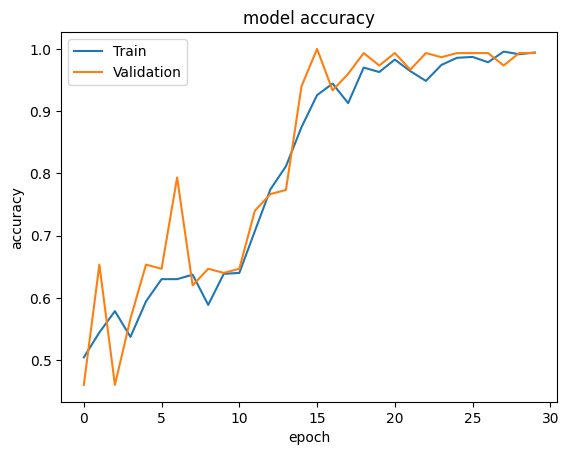

In [ ]:
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

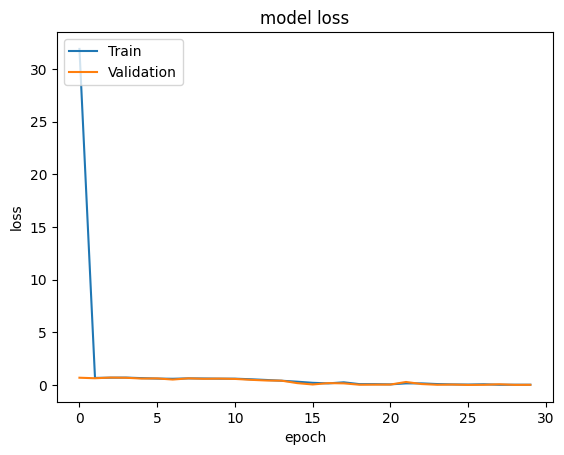

In [ ]:
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y=[]
for i in range(0,len(final_pred)):
    predict=np.argmax(final_pred[i])
    y.append(predict)

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test1, y, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.99        79
     Class 1       0.97      1.00      0.99        71

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
con=confusion_matrix(y,y_test1)
print(con)

[[77  0]
 [ 2 71]]


<Axes: >

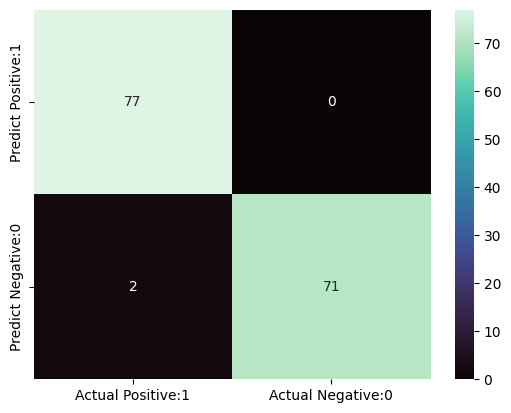

In [ ]:
import pandas as pd
import seaborn as sns
cm_matrix = pd.DataFrame(data=con, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='mako')

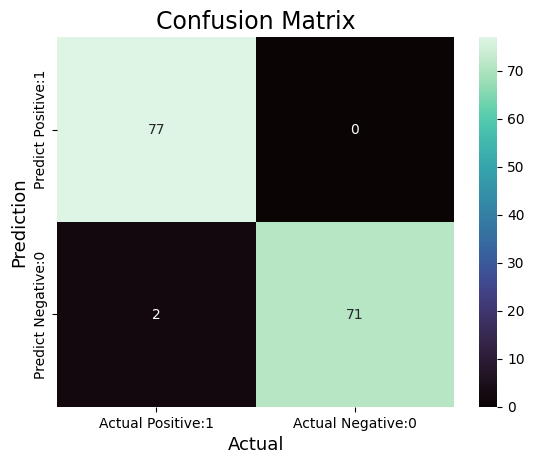

In [ ]:
sns.heatmap(cm_matrix,
            annot=True,
            fmt='g',
            cmap='mako',
            xticklabels=['Actual Positive:1', 'Actual Negative:0'],
            yticklabels=['Predict Positive:1', 'Predict Negative:0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
sensitivity = con[1][1] / (con[1][1] + con[1][0])

print("Sensitivity:", sensitivity*100)

sepcificity= con[0][0]/(con[0][0]+con[0][1])

print("Sepcificity:", sepcificity*100)

Sensitivity: 97.26027397260275
Sepcificity: 100.0


In [ ]:
from sklearn import metrics
targs=y_test1
preds=y
#print("accuracy: ", metrics.accuracy_score(targs, preds))
p=metrics.precision_score(targs, preds)
print("precision: ",p*100,"%" )
r=metrics.recall_score(targs, preds)
print("recall: ", r*100,"%")
f1=metrics.f1_score(targs, preds)
print("f1: ",f1*100,"%")
auc= metrics.roc_auc_score(targs, preds)
print("area under curve (auc): ", auc*100,"%")


precision:  97.26027397260275 %
recall:  100.0 %
f1:  98.61111111111111 %
area under curve (auc):  98.73417721518987 %


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(targs, preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.9873417721518987

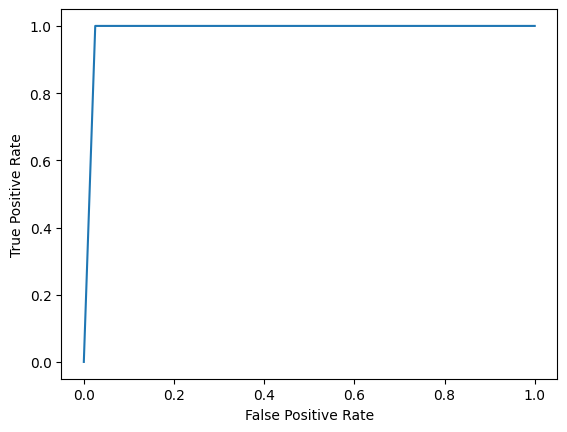

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(targs, preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

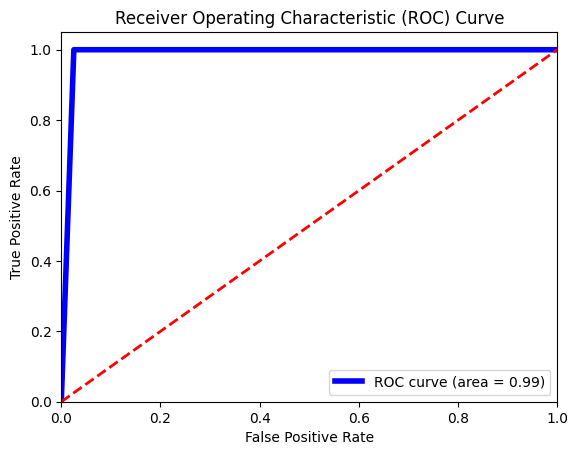

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ALEXNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def alexnet_classification(input_shape=(228, 228, 3)):
    model = Sequential()
    # First Convolutional Layer
    model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Second Convolutional Layer
    model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Third Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
    # Fourth Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
    # Fifth Convolutional Layer
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Flatten the output of the last convolutional layer
    model.add(Flatten())
    # Fully Connected Layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))  # Output layer for 1000 classes
    return model
alexnet_model = alexnet_classification()
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 384)         885120    
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 7, 384)        

In [ ]:
from keras.optimizers import Adam
alexnet_model.compile(optimizer=Adam(learning_rate=2.0e-3),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X=np.array(segment)
X=X.astype("float")

In [ ]:
import numpy as np
Y=np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y ,
                                   random_state=12,
                                   test_size=0.15,
                                   shuffle=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,y_train1 ,
                                   random_state=12,
                                   test_size=(0.15/(1-0.15)),
                                   shuffle=True)

In [ ]:
alex_hist=alexnet_model.fit(X_train2, y_train2, epochs=30, batch_size=60, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 10s 363ms/step - loss: 62.5942 - accuracy: 0.4643 - val_loss: 1.3329 - val_accuracy: 0.4600
Epoch 2/30
12/12 [==============================] - 1s 77ms/step - loss: 1.2985 - accuracy: 0.5157 - val_loss: 0.8732 - val_accuracy: 0.4600
Epoch 3/30
12/12 [==============================] - 1s 84ms/step - loss: 0.7238 - accuracy: 0.5014 - val_loss: 0.6995 - val_accuracy: 0.4600
Epoch 4/30
12/12 [==============================] - 1s 73ms/step - loss: 0.6697 - accuracy: 0.5514 - val_loss: 0.5912 - val_accuracy: 0.7133
Epoch 5/30
12/12 [==============================] - 1s 70ms/step - loss: 0.5966 - accuracy: 0.6700 - val_loss: 0.5528 - val_accuracy: 0.7267
Epoch 6/30
12/12 [==============================] - 1s 71ms/step - loss: 0.5388 - accuracy: 0.7386 - val_loss: 0.5217 - val_accuracy: 0.7667
Epoch 7/30
12/12 [==============================] - 1s 67ms/step - loss: 0.4763 - accuracy: 0.8171 - val_loss: 0.3486 - val_accuracy: 0.8533
Epoch 8/30

In [ ]:
alexnet_model.save('/content/drive/MyDrive/alexnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc =alexnet_model.evaluate(X_val,y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 1s 120ms/step - loss: 0.2177 - accuracy: 0.9667
Accuracy =  96.66666388511658 %


In [ ]:
final_pred=alexnet_model.predict(X_test1)
predict=np.argmax(final_pred[:1])
predict

5/5 [==============================] - 0s 12ms/step


0

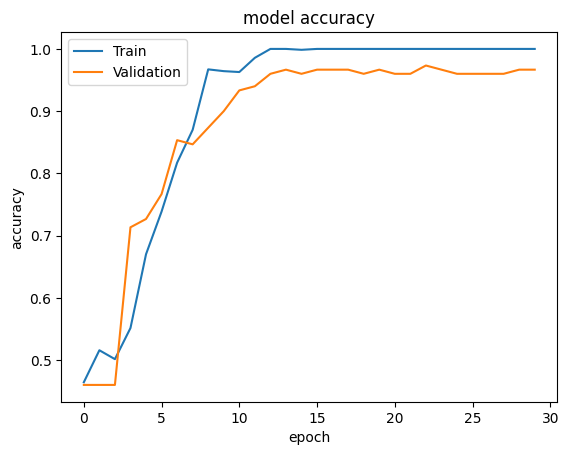

In [ ]:
plt.plot(alex_hist.history['accuracy'])
plt.plot(alex_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

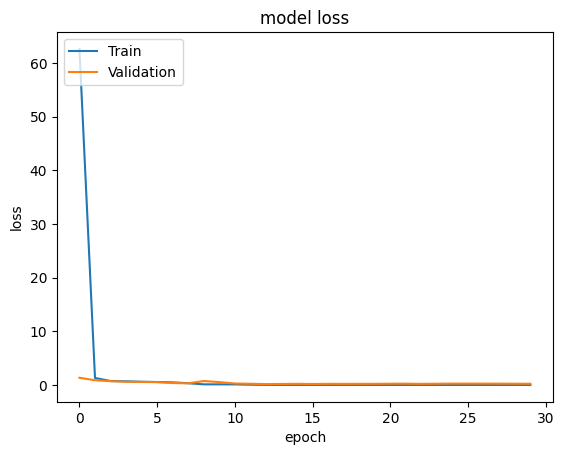

In [ ]:
plt.plot(alex_hist.history['loss'])
plt.plot(alex_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y=[]
for i in range(0,len(final_pred)):
    predict=np.argmax(final_pred[i])
    y.append(predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test1, y, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95        79
     Class 1       0.96      0.93      0.94        71

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
con=confusion_matrix(y,y_test1)
print(con)

[[76  5]
 [ 3 66]]


<Axes: >

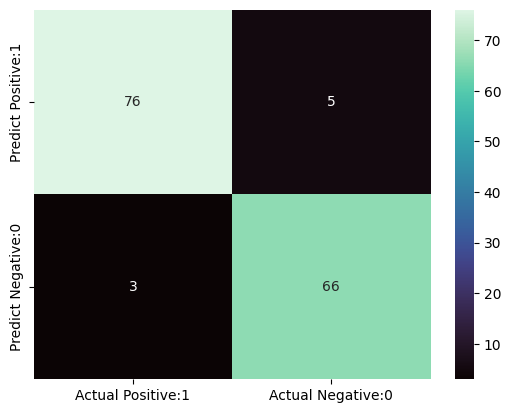

In [ ]:
import pandas as pd
import seaborn as sns
cm_matrix = pd.DataFrame(data=con, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='mako')

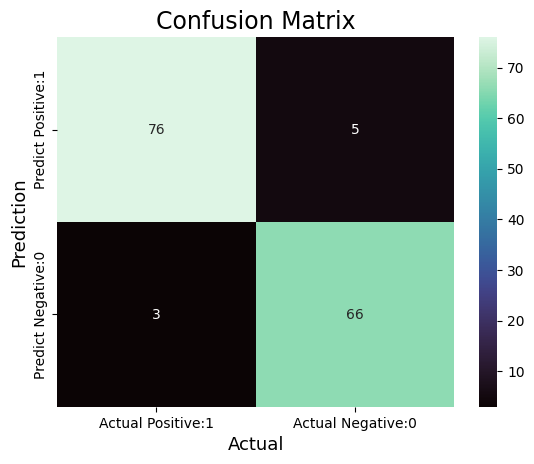

In [ ]:
sns.heatmap(cm_matrix,
            annot=True,
            fmt='g',
            cmap='mako',
            xticklabels=['Actual Positive:1', 'Actual Negative:0'],
            yticklabels=['Predict Positive:1', 'Predict Negative:0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
sensitivity = con[1][1] / (con[1][1] + con[1][0])

print("Sensitivity:", sensitivity*100)

sepcificity= con[0][0]/(con[0][0]+con[0][1])

print("Sepcificity:", sepcificity*100)

Sensitivity: 95.65217391304348
Sepcificity: 93.82716049382715


In [ ]:
from sklearn import metrics
targs=y_test1
preds=y
#print("accuracy: ", metrics.accuracy_score(targs, preds))
p=metrics.precision_score(targs, preds)
print("precision: ",p*100,"%" )
r=metrics.recall_score(targs, preds)
print("recall: ", r*100,"%")
f1=metrics.f1_score(targs, preds)
print("f1: ",f1*100,"%")
auc= metrics.roc_auc_score(targs, preds)
print("area under curve (auc): ", auc*100,"%")

precision:  95.65217391304348 %
recall:  92.95774647887323 %
f1:  94.28571428571428 %
area under curve (auc):  94.58013906222143 %


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(targs, preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.9458013906222144

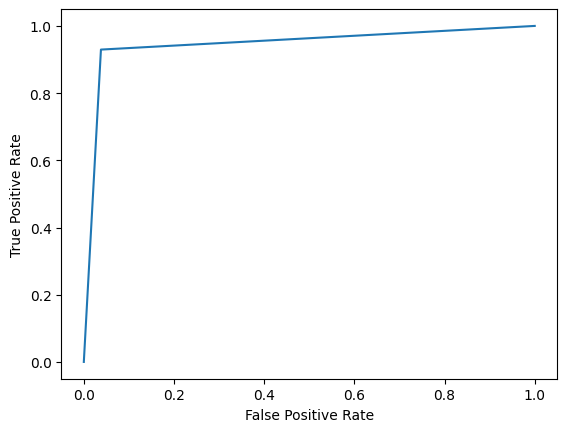

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(targs, preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

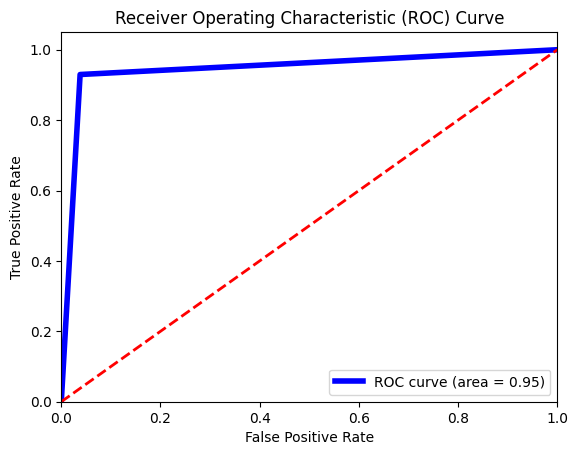

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Resnet**

In [ ]:
from tensorflow.keras import layers, models

def build_resnet(input_size):
    # Input layer
    input_layer = layers.Input(shape=(input_size, input_size, 3))

    # First convolutional layer
    x = layers.Conv2D(64, (7, 7), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    for _ in range(3):
        residual = x

        # First convolutional block
        x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.add([x, residual])
        x = layers.Activation('relu')(x)

    # Flatten layer
    x = layers.GlobalAveragePooling2D()(x)

    # Output layer
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

    # Print model summary
    resnet_model.summary()

    return resnet_model

# Test the function with a specific input size
input_size = 228
num_classes = 1000  # Number of output classes
resnet_model = build_resnet(input_size)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 228, 228, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_10 (MaxPooli  (None, 114, 114, 64)         0         ['conv2d_30[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 114, 114, 64)         36928     ['max_pooling2d_10[0][0]

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=2.0e-3),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
X=np.array(segment)
X=X.astype("float")

In [ ]:
Y=np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y ,
                                   random_state=12,
                                   test_size=0.15,
                                   shuffle=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,y_train1 ,
                                   random_state=12,
                                   test_size=(0.15/(1-0.15)),
                                   shuffle=True)

In [ ]:
resnet_hist=resnet_model.fit(X_train2, y_train2, epochs=30, batch_size=60, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 20s 951ms/step - loss: 2.3819 - accuracy: 0.4529 - val_loss: 5.6749 - val_accuracy: 0.4600
Epoch 2/30
12/12 [==============================] - 5s 422ms/step - loss: 0.8269 - accuracy: 0.4914 - val_loss: 3.0135 - val_accuracy: 0.4600
Epoch 3/30
12/12 [==============================] - 5s 453ms/step - loss: 0.7422 - accuracy: 0.5257 - val_loss: 1.5742 - val_accuracy: 0.4600
Epoch 4/30
12/12 [==============================] - 5s 452ms/step - loss: 0.7422 - accuracy: 0.5200 - val_loss: 1.0250 - val_accuracy: 0.4600
Epoch 5/30
12/12 [==============================] - 5s 453ms/step - loss: 0.7249 - accuracy: 0.5286 - val_loss: 0.9764 - val_accuracy: 0.4600
Epoch 6/30
12/12 [==============================] - 5s 423ms/step - loss: 0.7475 - accuracy: 0.5000 - val_loss: 0.9241 - val_accuracy: 0.4600
Epoch 7/30
12/12 [==============================] - 5s 447ms/step - loss: 0.6982 - accuracy: 0.5600 - val_loss: 0.8841 - val_accuracy: 0.4600
Epoch

In [ ]:
model.save('/content/drive/MyDrive/resnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc =resnet_model.evaluate(X_val,y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 2s 256ms/step - loss: 0.5343 - accuracy: 0.7600
Accuracy =  75.99999904632568 %


In [ ]:
final_pred=resnet_model.predict(X_test1)
predict=np.argmax(final_pred[:1])
predict

5/5 [==============================] - 0s 61ms/step


1

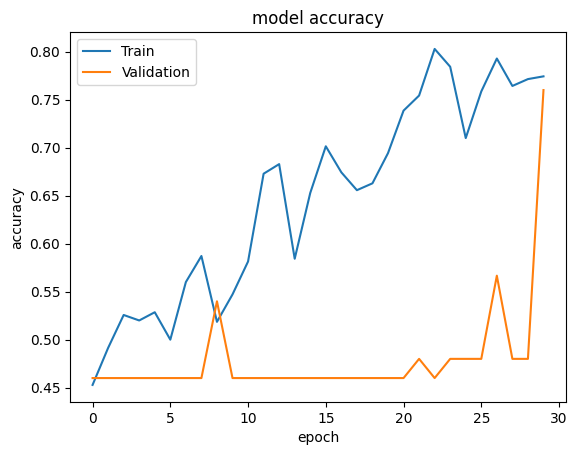

In [ ]:
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

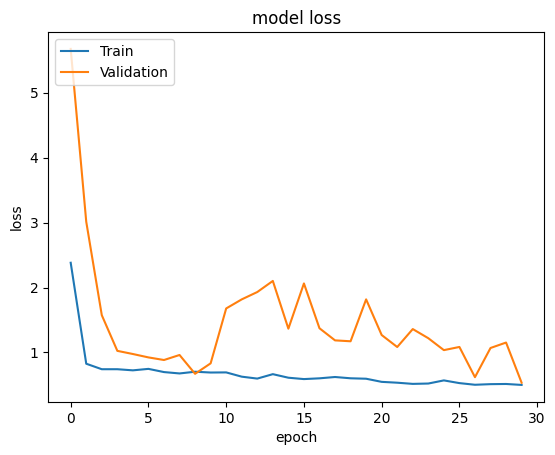

In [ ]:
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y=[]
for i in range(0,len(final_pred)):
    predict=np.argmax(final_pred[i])
    y.append(predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test1, y, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.44      0.58        79
     Class 1       0.59      0.90      0.72        71

    accuracy                           0.66       150
   macro avg       0.71      0.67      0.65       150
weighted avg       0.72      0.66      0.64       150



In [ ]:
con=confusion_matrix(y,y_test1)
print(con)

[[35  7]
 [44 64]]


<Axes: >

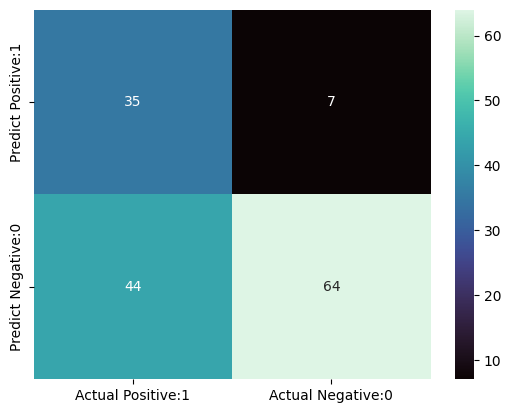

In [ ]:
import pandas as pd
import seaborn as sns
cm_matrix = pd.DataFrame(data=con, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='mako')

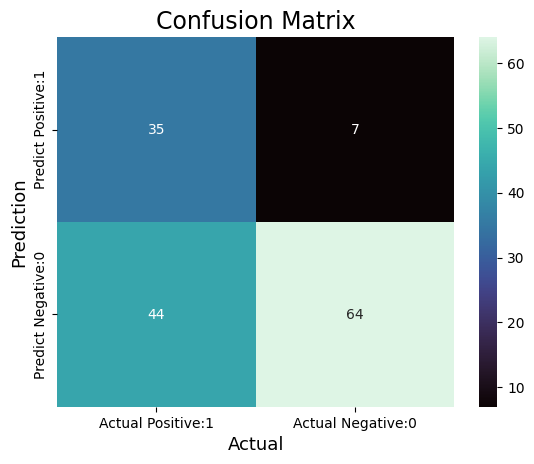

In [ ]:

sns.heatmap(cm_matrix,
            annot=True,
            fmt='g',
            cmap='mako',
            xticklabels=['Actual Positive:1', 'Actual Negative:0'],
            yticklabels=['Predict Positive:1', 'Predict Negative:0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
sensitivity = con[1][1] / (con[1][1] + con[1][0])

print("Sensitivity:", sensitivity*100)

sepcificity= con[0][0]/(con[0][0]+con[0][1])

print("Sepcificity:", sepcificity*100)

Sensitivity: 59.25925925925925
Sepcificity: 83.33333333333334


In [ ]:
from sklearn import metrics
targs=y_test1
preds=y
#print("accuracy: ", metrics.accuracy_score(targs, preds))
p=metrics.precision_score(targs, preds)
print("precision: ",p*100,"%" )
r=metrics.recall_score(targs, preds)
print("recall: ", r*100,"%")
f1=metrics.f1_score(targs, preds)
print("f1: ",f1*100,"%")
auc= metrics.roc_auc_score(targs, preds)
print("area under curve (auc): ", auc*100,"%")

precision:  59.25925925925925 %
recall:  90.14084507042254 %
f1:  71.50837988826815 %
area under curve (auc):  67.22232126938849 %


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(targs, preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.6722232126938849

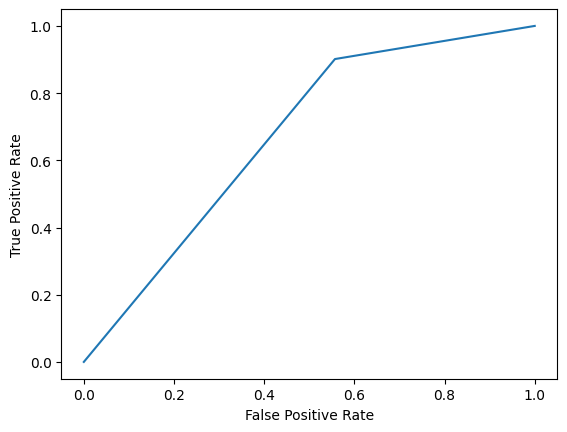

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(targs, preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

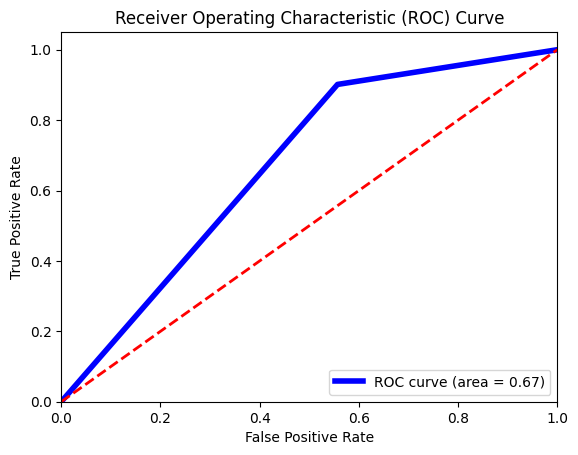

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **GoogleNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    # 3x3 convolution
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    # 5x5 convolution
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    # Max pooling
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    max_pool_conv = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(max_pool)
    # Concatenate
    return layers.concatenate([conv1x1, conv3x3, conv5x5, max_pool_conv], axis=-1)

def googleNet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    # First Convolutional Layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    # Second Convolutional Layer
    x = layers.Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    # Inception Modules
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)
    # Fully connected layers
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

input_shape = (228, 228, 3)  
num_classes = 2
google_model = googleNet(input_shape, num_classes)
google_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 114, 114, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_11 (MaxPooli  (None, 57, 57, 64)           0         ['conv2d_37[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 57, 57, 64)           4160      ['max_pooling2d_11[0][0]

In [ ]:
from keras.optimizers import Adam
google_model.compile(optimizer=Adam(learning_rate=2.0e-3),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X=np.array(segment)
X=X.astype("float")

In [ ]:
import numpy as np
Y=np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y ,
                                   random_state=12,
                                   test_size=0.15,
                                   shuffle=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,y_train1 ,
                                   random_state=12,
                                   test_size=(0.15/(1-0.15)),
                                   shuffle=True)

In [ ]:
google_hist=google_model.fit(X_train2, y_train2, epochs=30, batch_size=60, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 21s 777ms/step - loss: 6.0695 - accuracy: 0.4600 - val_loss: 0.7782 - val_accuracy: 0.4600
Epoch 2/30
12/12 [==============================] - 2s 169ms/step - loss: 0.7670 - accuracy: 0.5129 - val_loss: 0.7082 - val_accuracy: 0.7533
Epoch 3/30
12/12 [==============================] - 2s 169ms/step - loss: 0.7286 - accuracy: 0.5186 - val_loss: 0.6728 - val_accuracy: 0.8133
Epoch 4/30
12/12 [==============================] - 2s 170ms/step - loss: 0.7113 - accuracy: 0.5414 - val_loss: 0.6503 - val_accuracy: 0.6333
Epoch 5/30
12/12 [==============================] - 2s 157ms/step - loss: 0.7055 - accuracy: 0.5529 - val_loss: 0.5977 - val_accuracy: 0.7467
Epoch 6/30
12/12 [==============================] - 2s 169ms/step - loss: 0.6345 - accuracy: 0.6600 - val_loss: 0.5156 - val_accuracy: 0.7867
Epoch 7/30
12/12 [==============================] - 2s 163ms/step - loss: 0.5665 - accuracy: 0.7129 - val_loss: 0.4177 - val_accuracy: 0.8667
Epoch

In [ ]:
google_model.save('/content/drive/MyDrive/googlenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

_, acc =google_model.evaluate(X_val,y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 3s 315ms/step - loss: 0.0361 - accuracy: 0.9867
Accuracy =  98.66666793823242 %


In [ ]:
final_pred=google_model.predict(X_test1)
predict=np.argmax(final_pred[:1])
predict

5/5 [==============================] - 0s 39ms/step


0

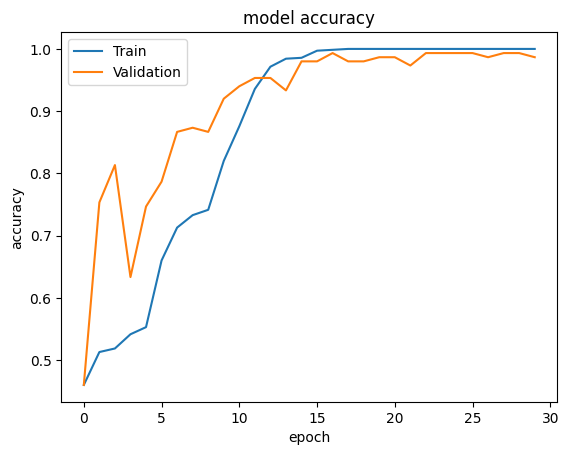

In [ ]:
plt.plot(google_hist.history['accuracy'])
plt.plot(google_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

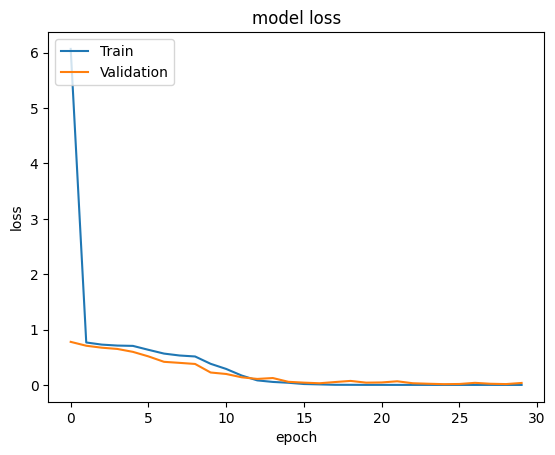

In [ ]:
plt.plot(google_hist.history['loss'])
plt.plot(google_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y=[]
for i in range(0,len(final_pred)):
    predict=np.argmax(final_pred[i])
    y.append(predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test1, y, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99        79
     Class 1       0.99      0.99      0.99        71

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
con=confusion_matrix(y,y_test1)
print(con)

[[78  1]
 [ 1 70]]


<Axes: >

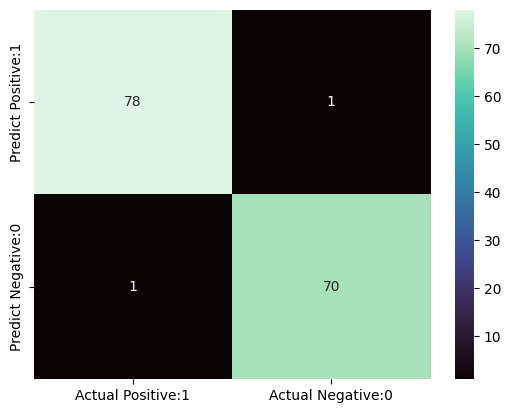

In [ ]:
import pandas as pd
import seaborn as sns
cm_matrix = pd.DataFrame(data=con, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='mako')

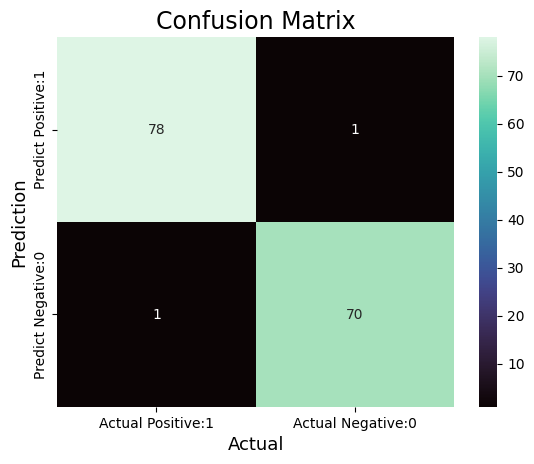

In [ ]:
sns.heatmap(cm_matrix,
            annot=True,
            fmt='g',
            cmap='mako',
            xticklabels=['Actual Positive:1', 'Actual Negative:0'],
            yticklabels=['Predict Positive:1', 'Predict Negative:0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
sensitivity = con[1][1] / (con[1][1] + con[1][0])

print("Sensitivity:", sensitivity*100)

sepcificity= con[0][0]/(con[0][0]+con[0][1])

print("Sepcificity:", sepcificity*100)

Sensitivity: 98.59154929577466
Sepcificity: 98.73417721518987


In [ ]:
from sklearn import metrics
targs=y_test1
preds=y
#print("accuracy: ", metrics.accuracy_score(targs, preds))
p=metrics.precision_score(targs, preds)
print("precision: ",p*100,"%" )
r=metrics.recall_score(targs, preds)
print("recall: ", r*100,"%")
f1=metrics.f1_score(targs, preds)
print("f1: ",f1*100,"%")
auc= metrics.roc_auc_score(targs, preds)
print("area under curve (auc): ", auc*100,"%")

precision:  98.59154929577466 %
recall:  98.59154929577466 %
f1:  98.59154929577466 %
area under curve (auc):  98.66286325548226 %


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(targs, preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.9866286325548227

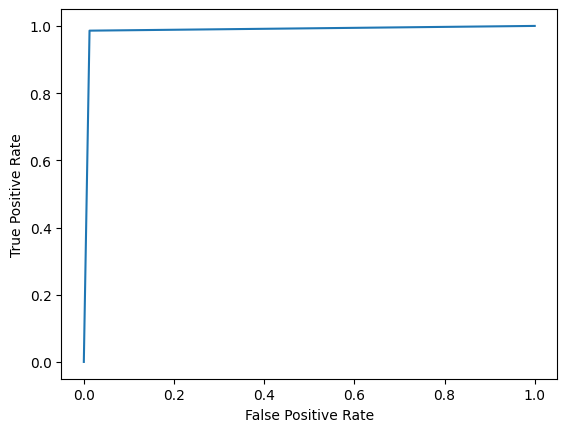

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(targs, preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

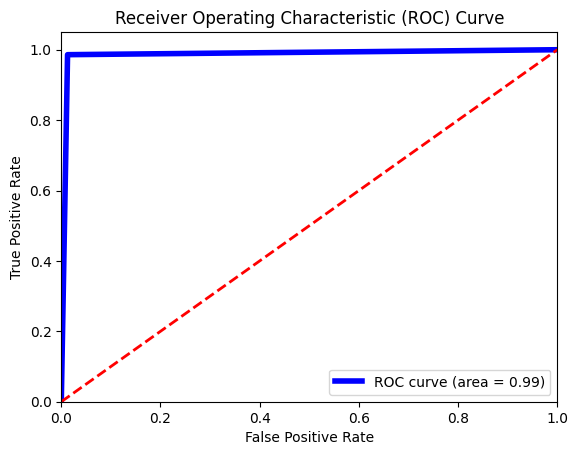

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
google_model.save('/content/drive/MyDrive/googlenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **VGG16**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def vgg_block(x, num_convs, num_filters):
    for _ in range(num_convs):
        x = layers.Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    return x

def vgg16(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    # VGG blocks
    x = vgg_block(inputs, 2, 64)
    x = vgg_block(x, 2, 128)
    x = vgg_block(x, 3, 256)
    x = vgg_block(x, 3, 512)
    x = vgg_block(x, 3, 512)
    # Flatten
    x = layers.Flatten()(x)
    # Fully connected layers
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

input_shape = (228, 228, 3) 
num_classes = 2
vgg16_model = vgg16(input_shape, num_classes)
vgg16_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 228, 228, 3)]     0         
                                                                 
 conv2d_48 (Conv2D)          (None, 228, 228, 64)      1792      
                                                                 
 conv2d_49 (Conv2D)          (None, 228, 228, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 114, 114, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 114, 114, 128)     73856     
                                                                 
 conv2d_51 (Conv2D)          (None, 114, 114, 128)     147584    
                                                           

In [ ]:
from keras.optimizers import Adam
vgg16_model.compile(optimizer=Adam(learning_rate=2.0e-3),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

X=np.array(segment)
X=X.astype("float")

In [ ]:
import numpy as np
Y=np.array(y_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y ,
                                   random_state=12,
                                   test_size=0.15,
                                   shuffle=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train1,y_train1 ,
                                   random_state=12,
                                   test_size=(0.15/(1-0.15)),
                                   shuffle=True)

In [ ]:
vgg16_hist=vgg16_model.fit(X_train2, y_train2, epochs=30, batch_size=60, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 80s 4s/step - loss: 22296.8535 - accuracy: 0.4571 - val_loss: 3.1305 - val_accuracy: 0.5400
Epoch 2/30
12/12 [==============================] - 11s 897ms/step - loss: 1.9256 - accuracy: 0.5086 - val_loss: 0.7659 - val_accuracy: 0.4600
Epoch 3/30
12/12 [==============================] - 10s 837ms/step - loss: 0.8014 - accuracy: 0.5314 - val_loss: 0.6860 - val_accuracy: 0.5400
Epoch 4/30
12/12 [==============================] - 10s 842ms/step - loss: 0.7382 - accuracy: 0.5100 - val_loss: 0.6877 - val_accuracy: 0.5400
Epoch 5/30
12/12 [==============================] - 10s 846ms/step - loss: 0.7179 - accuracy: 0.5171 - val_loss: 0.6829 - val_accuracy: 0.6400
Epoch 6/30
12/12 [==============================] - 11s 903ms/step - loss: 0.7030 - accuracy: 0.5286 - val_loss: 0.6590 - val_accuracy: 0.6533
Epoch 7/30
12/12 [==============================] - 10s 846ms/step - loss: 0.6564 - accuracy: 0.5929 - val_loss: 0.6063 - val_accuracy: 0.640

In [ ]:
vgg16_model.save('/content/drive/MyDrive/vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc =vgg16_model.evaluate(X_val,y_val)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 12s 1s/step - loss: 4.1869e-04 - accuracy: 1.0000
Accuracy =  100.0 %


In [ ]:
final_pred=vgg16_model.predict(X_test1)
predict=np.argmax(final_pred[:1])
predict

5/5 [==============================] - 1s 137ms/step


0

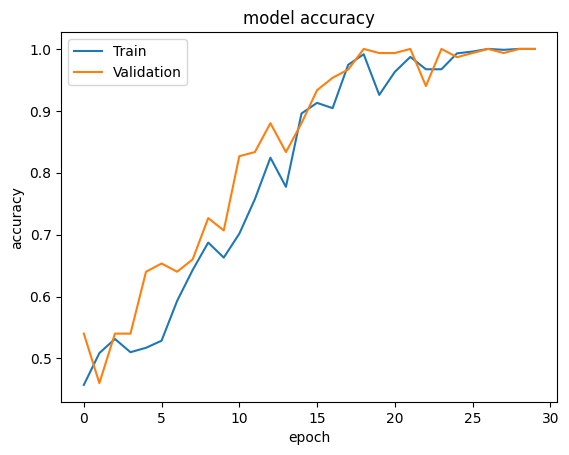

In [ ]:
plt.plot(vgg16_hist.history['accuracy'])
plt.plot(vgg16_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

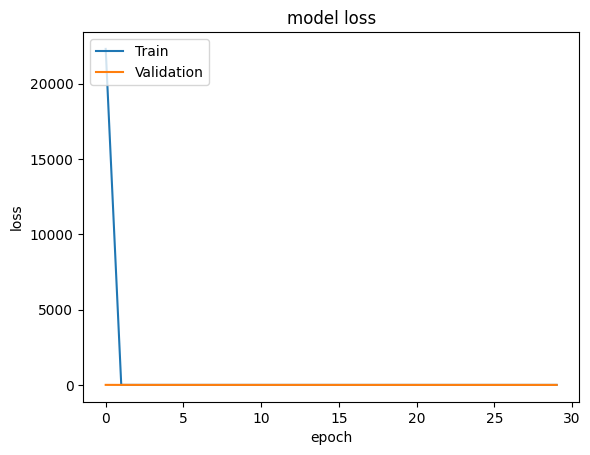

In [ ]:
plt.plot(vgg16_hist.history['loss'])
plt.plot(vgg16_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y=[]
for i in range(0,len(final_pred)):
    predict=np.argmax(final_pred[i])
    y.append(predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test1, y, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        79
     Class 1       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:
con=confusion_matrix(y,y_test1)
print(con)

[[79  0]
 [ 0 71]]


<Axes: >

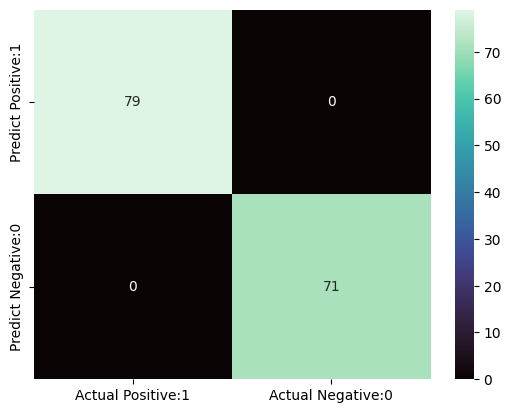

In [ ]:
import pandas as pd
import seaborn as sns
cm_matrix = pd.DataFrame(data=con, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='mako')

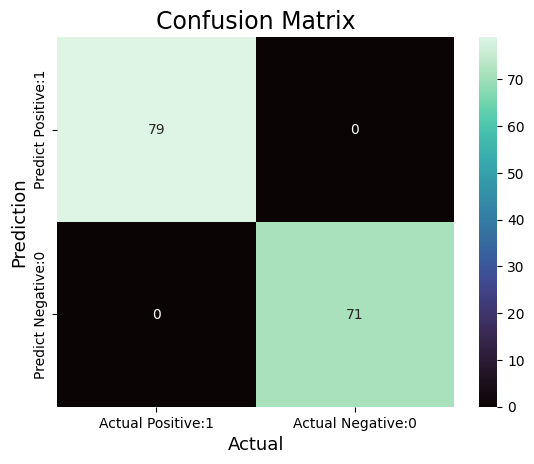

In [ ]:
sns.heatmap(cm_matrix,
            annot=True,
            fmt='g',
            cmap='mako',
            xticklabels=['Actual Positive:1', 'Actual Negative:0'],
            yticklabels=['Predict Positive:1', 'Predict Negative:0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
sensitivity = con[1][1] / (con[1][1] + con[1][0])

print("Sensitivity:", sensitivity*100)

sepcificity= con[0][0]/(con[0][0]+con[0][1])

print("Sepcificity:", sepcificity*100)

Sensitivity: 100.0
Sepcificity: 100.0


In [ ]:
from sklearn import metrics
targs=y_test1
preds=y
#print("accuracy: ", metrics.accuracy_score(targs, preds))
p=metrics.precision_score(targs, preds)
print("precision: ",p*100,"%" )
r=metrics.recall_score(targs, preds)
print("recall: ", r*100,"%")
f1=metrics.f1_score(targs, preds)
print("f1: ",f1*100,"%")
auc= metrics.roc_auc_score(targs, preds)
print("area under curve (auc): ", auc*100,"%")

precision:  100.0 %
recall:  100.0 %
f1:  100.0 %
area under curve (auc):  100.0 %


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(targs, preds)
roc_auc = auc(fpr, tpr)
roc_auc

1.0

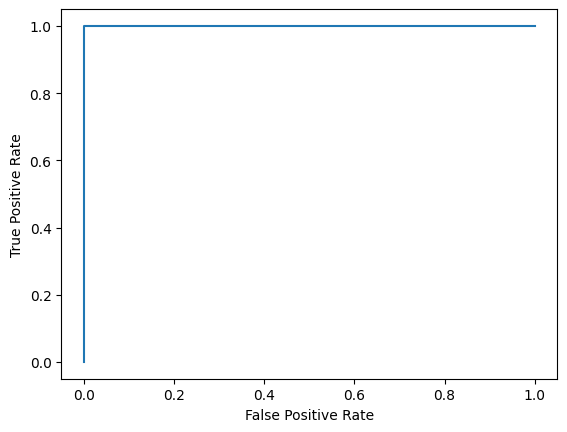

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(targs, preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

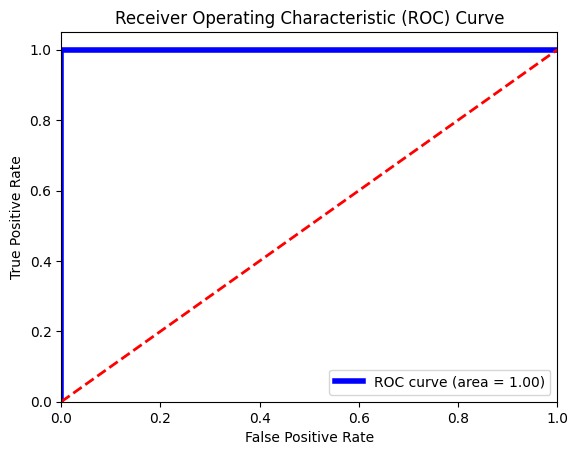

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()